# Importing libraries

In [239]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk

# Loading the data

In [240]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
y = df["label"].values
df = df.drop("label", axis=1)

In [242]:
np.asarray(df).shape

(42000, 784)

In [243]:
x = np.asarray(df).reshape(42000, 28, 28)

In [244]:
del df

In [245]:
x.shape, y.shape

((42000, 28, 28), (42000,))

# Data visualization

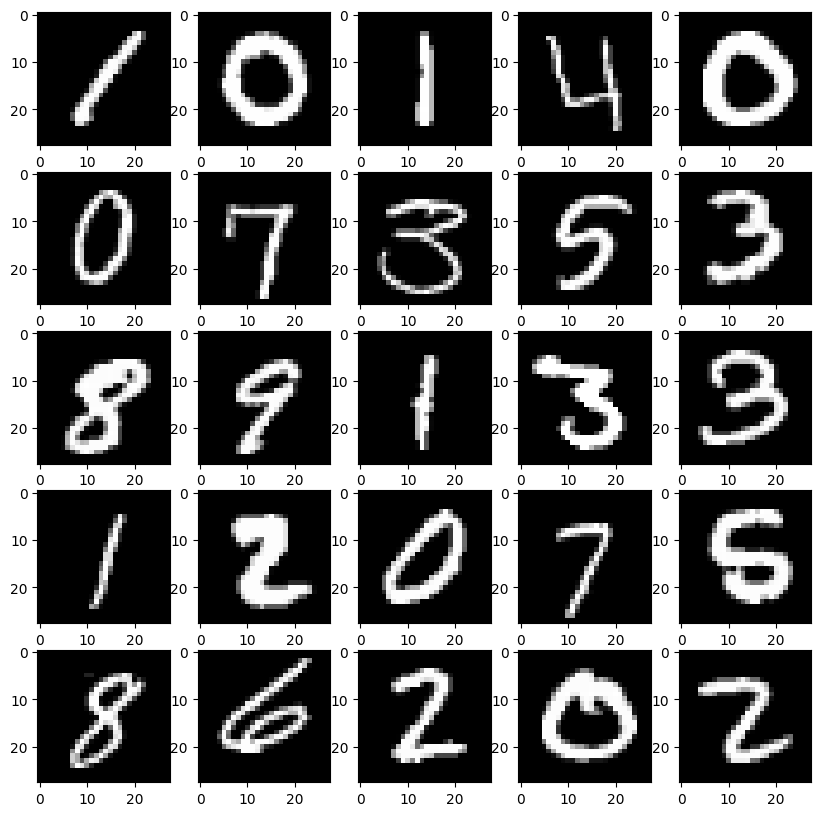

In [246]:
import matplotlib.pyplot as plt

figs, axs = plt.subplots(5,5, figsize=(10, 10))
axs = axs.flatten()
for ax, i in zip(axs, range(25)):
    ax.imshow(x[i], cmap="gray")
plt.show()

# Data preprocessing

In [247]:
from sklearn import model_selection
x_train, x_val, y_train, y_val = sk.model_selection.train_test_split(x, y, test_size=0.3)

In [248]:
del x
del y

In [249]:
# We will scale our features to be in the range [0,1].
x_train_scaled = x_train / 255.0
x_val_scaled = x_val / 255.0

# Since our labels are categories, we should use OneHotEncoder.
from sklearn import preprocessing

ohe = sk.preprocessing.OneHotEncoder()
y_train_encoded = ohe.fit_transform(np.asarray(y_train).reshape(-1, 1)).todense()
y_val_encoded = ohe.transform(np.asarray(y_val).reshape(-1, 1)).todense()

In [250]:
del x_train
del x_val
del y_train
del y_val

In [251]:
x_train_scaled.shape, x_val_scaled.shape

((29400, 28, 28), (12600, 28, 28))

In [252]:
y_train_encoded.shape, y_val_encoded.shape

((29400, 10), (12600, 10))

# Building the model

In [253]:
def build_model():
    inputs = tf.keras.Input(shape=(28,28,1))
    x = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu")(inputs)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu")(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

model = build_model()
model.summary(show_trainable=True)

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_26 (InputLayer) │ (None, 28, 28, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_34 (Conv2D)          │ (None, 26, 26, 32)    │        320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ average_pooling2d_31        │ (None, 13, 13, 32)    │          0 │   -   │
│ (AveragePooling2D)          │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_35 (Conv2D)          │ (None, 11, 11, 64)    │     18,496 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ average_pooling2d_32        │ (None, 5, 5, 64)      │          0 │   -   │
│ (AveragePooling2D)          │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_22 (Flatten)        │ (None, 1600)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_60 (Dense)            │ (None, 128)           │    204,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_15 (Dropout)        │ (None, 128)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_61 (Dense)            │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [254]:
init_learning_rate = 1e-3
epochs = 30
scheduler = tf.keras.optimizers.schedules.CosineDecay(init_learning_rate, 1000, alpha=1e-3)

In [259]:
model.compile(optimizer=tf.keras.optimizers.SGD(scheduler),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["categorical_accuracy"])

In [260]:
history = model.fit(x=x_train_scaled, y=y_train_encoded, validation_data=(x_val_scaled, y_val_encoded), epochs=epochs)

Epoch 1/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9961 - loss: 0.0149 - val_categorical_accuracy: 0.9875 - val_loss: 0.2656
Epoch 2/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9966 - loss: 0.0130 - val_categorical_accuracy: 0.9875 - val_loss: 0.2655
Epoch 3/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9976 - loss: 0.0085 - val_categorical_accuracy: 0.9875 - val_loss: 0.2654
Epoch 4/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9972 - loss: 0.0117 - val_categorical_accuracy: 0.9875 - val_loss: 0.2654
Epoch 5/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9973 - loss: 0.0099 - val_categorical_accuracy: 0.9875 - val_loss: 0.2653
Epoch 6/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9963 - loss: 0.0126 - val_categorical_accuracy: 0.9875 - val_loss: 0.2652
Epoch 7/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9967 - los

# Error analysis

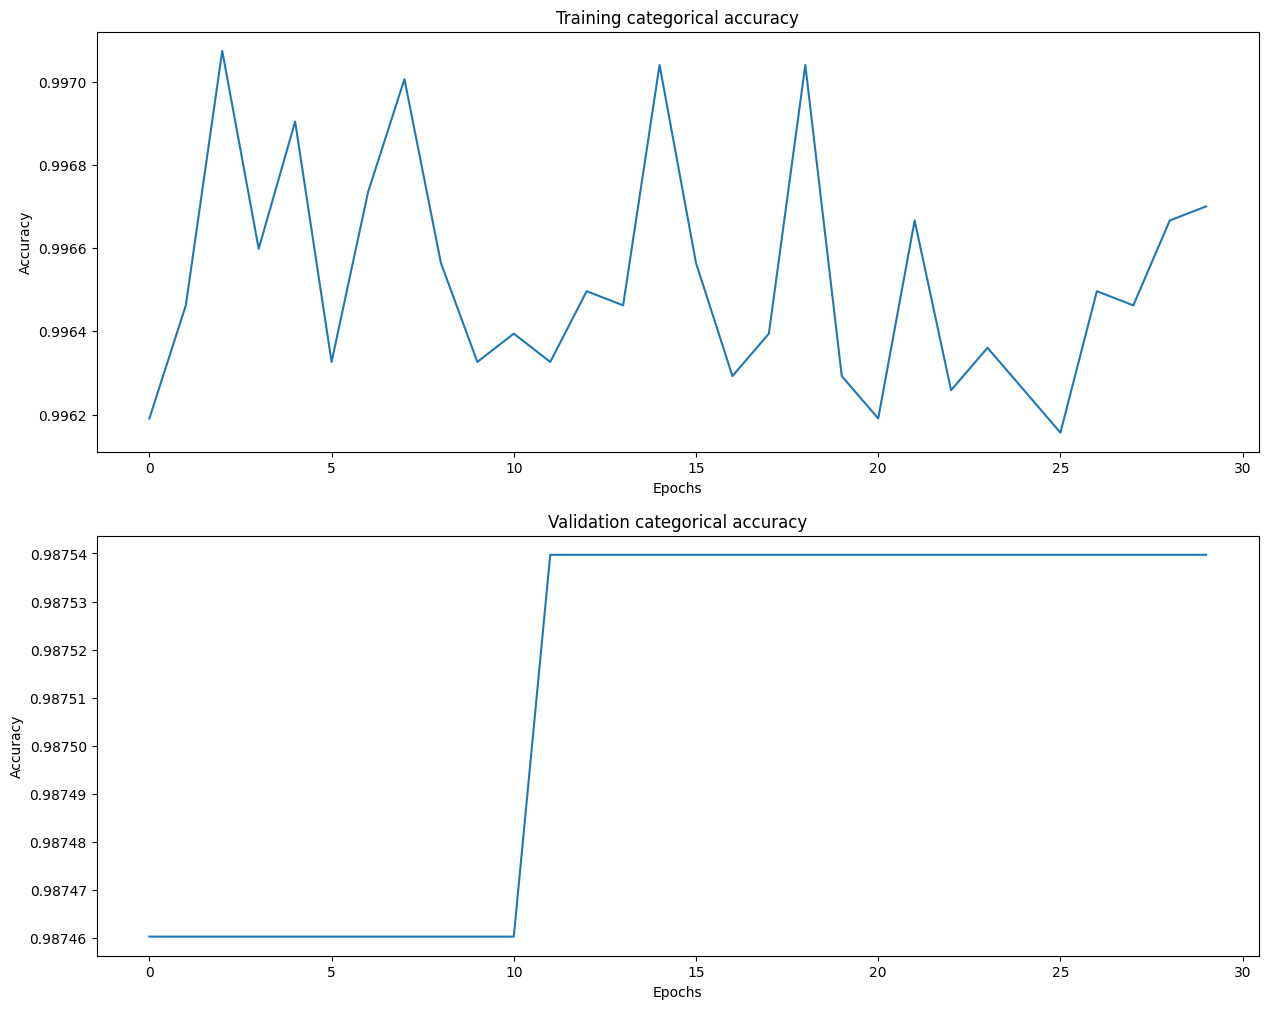

In [262]:
figs, axs = plt.subplots(2,1, figsize=(15,12))
axs[0].plot(range(epochs), history.history["categorical_accuracy"])
axs[0].set_title("Training categorical accuracy")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[1].plot(range(epochs), history.history["val_categorical_accuracy"])
axs[1].set_title("Validation categorical accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
plt.show()

# Prediction on the test set

In [264]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
np.asarray(test).shape

(28000, 784)

In [266]:
test = np.asarray(test).reshape(28000, 28, 28)
test.shape

(28000, 28, 28)

In [269]:
yhat_encoded = model.predict(test)
yhat_encoded.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(28000, 10)

In [271]:
yhat = ohe.inverse_transform(yhat_encoded)
yhat.shape

(28000, 1)

In [272]:
yhat

array([[2],
       [0],
       [9],
       ...,
       [3],
       [9],
       [2]])

# Transferring results to a csv file

In [284]:
df = pd.DataFrame({"ImageId": range(1, yhat.shape[0]+1),
                 "Label": yhat.reshape(-1)})
df.to_csv("submission.csv", index=False)